# Torrence and Compo 1998
## [sst_nino3.data example based on NCL](https://github.com/NCAR/geocat-scratch/blob/main/geocat-comp/wavelet/wavelet_WORKING.ncl)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd
import math

import pywt

In [83]:
# Download nino data
#nino_url = 'https://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
#sst_data = np.genfromtxt(nino_url, skip_header=19)

# Collect Data from Local Source (after downloaded)
sst_data = np.loadtxt("data/nino3sst_trimmed.txt")
time_0 = 1871.0
dt = 0.25  # years
time_range = (np.arange(0, len(sst_data)) * dt) + time_0 # from 1871.00 to 1996.75

sst_df = pd.DataFrame({'time (years)': time_range, 'temperature (C)': sst_data})

sst_df.head()

,time (years),temperature (C)
0,1871.00,-0.15
1,1871.25,-0.30
2,1871.50,-0.14
3,1871.75,-0.41
4,1872.00,-0.46


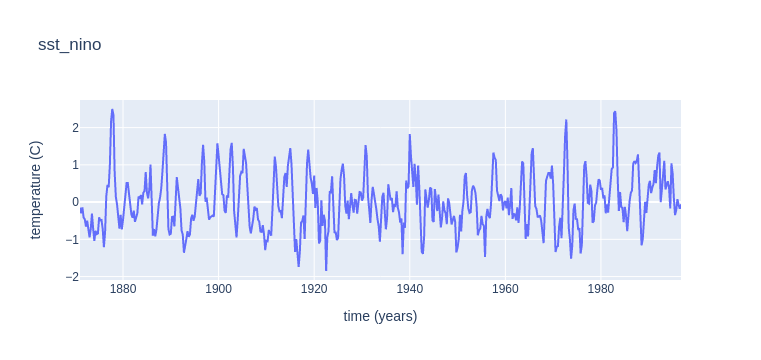

In [74]:
# Plot data
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

fig = px.line(data_frame=sst_df, x="time (years)", y="temperature (C)",
              title="sst_nino")
fig.show()

size (44, 504) with 44 scales and 504 time steps
x-axis (time) be default is: 504
y-axis (scale) be default is: 44


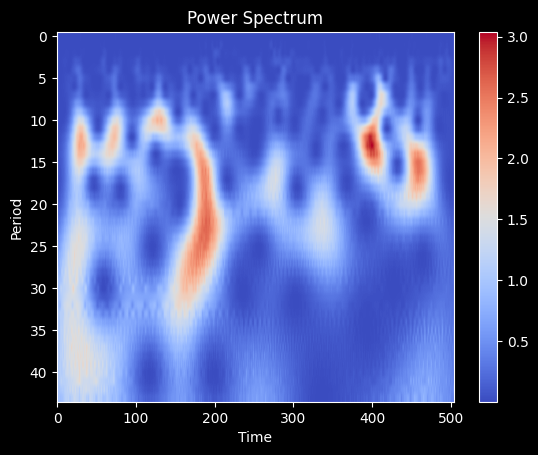

In [75]:
wavelet_mother = "cmor1.5-1.0" # Morlet in Torrence/Compo cooresponds to cmor in PyWavelets -> https://github.com/PyWavelets/pywt/issues/522#issuecomment-539227912

dt = 0.25 # sampling period (time between each y-value)
s0 = 0.25 # smallest scale
dj = 0.25 # spacing between discrete scales
n = len(sst_data)
jtot = 44
# npad = 1024 # pad with extra zeros (TODO)
# noise = 1 # test vs. red noise (TODO: no current implementation)
scales = np.arange(1, jtot+1)
wavelet_coeffs, freqs = pywt.cwt(data=sst_data,
                                 scales=scales,
                                 wavelet=wavelet_mother,
                                 sampling_period=dt)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis (time) be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis (scale) be default is: {wavelet_coeffs.shape[0]}")

# Plot scalogram
fig, ax = plt.subplots()
plt.style.use('dark_background')
data = np.power((abs(wavelet_coeffs)), 2)  # compare the magntiude
#ax.set_yscale("log", base=2)

plt.title("Power Spectrum")
plt.xlabel("Time")
plt.ylabel("Period")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.show()

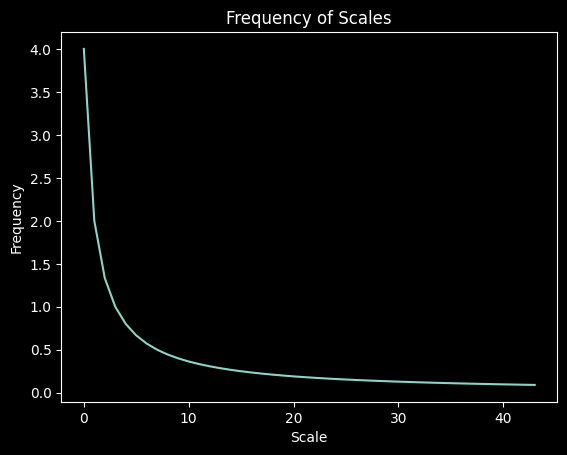

In [77]:
# Useful to determine the right range of scales
plt.style.use('dark_background')
plt.title("Frequency of Scales")
plt.xlabel("Scale")
plt.ylabel("Frequency")
plt.plot(freqs)

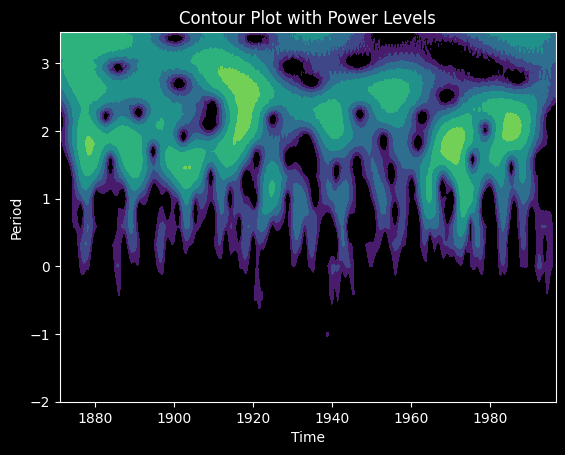

In [81]:
# contour plot
fig, ax = plt.subplots()
plt.style.use('dark_background')
period = 1 / freqs
power = np.power(abs(wavelet_coeffs), 2)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
ax.contourf(time_range, np.log2(period), np.log2(power), np.log2(levels))
plt.title("Contour Plot with Power Levels")
plt.xlabel("Time")
plt.ylabel("Period")
plt.show()

# Compare NCL to PyWavelets Output

In [110]:
# Compare Output Coefficients
ncl_data = np.genfromtxt("data/ncl_csv.csv", skip_header=1, delimiter=',')
print(ncl_data[:][1])

#time_range = (np.arange(0, len(ncl_data)) * dt) + time_0 # from 1871.00 to 1996.75
#ncl_df = pd.DataFrame({'time (years)': time_range, 'temperature (C)': ncl_data})
#ncl_df.head()
#print(f"NCL dataframe is the same as the data from paos = {np.all(ncl_df == sst_df)}")

[ 1.  -0.3]
